# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm

Load feature names.

In [2]:
feature_names = []
with open('./data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print 'Loaded feature names:', len(feature_names)
#print feature_names

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [47]:
X, Y = [], []

with open('./data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print train_data.shape, test_data.shape

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

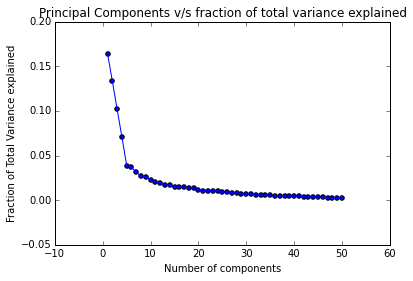

In [48]:
def P1():
    ### STUDENT START ###
    try:
        prin_comp = 50
        sklearn_pca = PCA(n_components=prin_comp)
        sklearn_transf = sklearn_pca.fit(train_data)
        plt.title("Principal Components v/s fraction of total variance explained")
        plt.plot(np.r_[1:prin_comp+1],sklearn_transf.explained_variance_ratio_)
        plt.xlabel('Number of components')
        plt.ylabel('Fraction of Total Variance explained')
        plt.scatter( np.r_[1:prin_comp+1],sklearn_transf.explained_variance_ratio_)
        plt.show()
        
    except Exception as e:
        print "Exception Occured: ", e.args
        raise
    ### STUDENT END ###

P1()

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

(7000, 2)


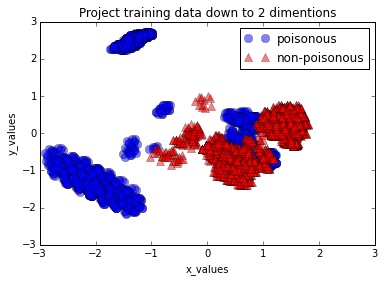

In [49]:
def P2():
    ### STUDENT START ###
    try:
        sklearn_pca = PCA(n_components=2)
        sklearn_transf = sklearn_pca.fit_transform(train_data)
        print sklearn_transf.shape
        #split data into poisonous and non poisonous cases
        poison_cases = sklearn_transf[train_labels==1]
        non_poison_cases = sklearn_transf[train_labels==0]
        plt.plot(poison_cases[:,0],poison_cases[:,1], 
         'o', markersize=8, color='blue', alpha=0.5, label='poisonous')
        plt.plot(non_poison_cases[:,0], non_poison_cases[:,1], 
         '^', markersize=8, color='red', alpha=0.5, label='non-poisonous')
        plt.xlabel('x_values')
        plt.ylabel('y_values')
        plt.xlim([-3,3])
        plt.ylim([-3,3])
        plt.legend()
        plt.title('Project training data down to 2 dimentions')
        plt.show()
    
    except Exception as e:
        print "Exception Occured: ", e.args
        raise

### STUDENT END ###

P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

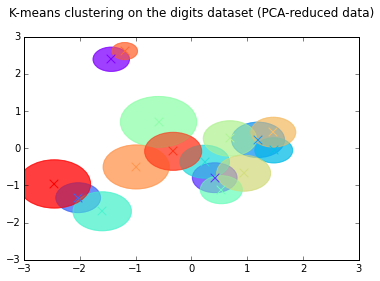

In [101]:
import scipy.spatial.distance as dist

def P3():
    ### STUDENT START ###
    try:
        sklearn_pca = PCA(n_components=2)
        sklearn_transf = sklearn_pca.fit_transform(train_data)
        km = KMeans (n_clusters=16, init='k-means++')
        clstrs16 = km.fit (sklearn_transf)
        labels = clstrs16.labels_
        centroids = clstrs16.cluster_centers_
        #colours for each circles of centroids
        col = plt.cm.rainbow(np.linspace(0,1,16))
        fig = plt.figure()
        ax = fig.add_subplot(111)
        for i in range(16):
            # select only data observations with cluster label == i
            ds = sklearn_transf[np.where(labels==i)]
            b = col[i]
            center = centroids[i]
            x = np.array([[centroids[i, 0], centroids[i, 1]]])
            y = np.repeat(x, ds.shape[0], axis=0)
            my_individual_dist = dist.cdist(ds,y,"euclidean")
            radius = np.amax(my_individual_dist[:,0]) 
            #plot the data observations
            e = plt.Circle((centroids[i, 0], centroids[i, 1]),radius)
            ax.add_artist(e)
            e.set_clip_box(ax.bbox)
            e.set_edgecolor( col[i] )
            e.set_facecolor(col[i])  # "none" not None
            e.set_alpha( 0.5 )
            ax.add_patch(e)
            # plot the centroids
            plt.scatter(centroids[i, 0], centroids[i, 1],
                    marker='x', s=75, linewidths=1,
                    color=b, zorder=10)
        plt.xlim([-3,3])
        plt.ylim([-3,3])
        plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n')
        plt.show()
       
    except Exception as e:
        print "Exception Occured: ", e.args
        raise
    ### STUDENT END ###

P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

Negative log-likelihood predicted by a GMM


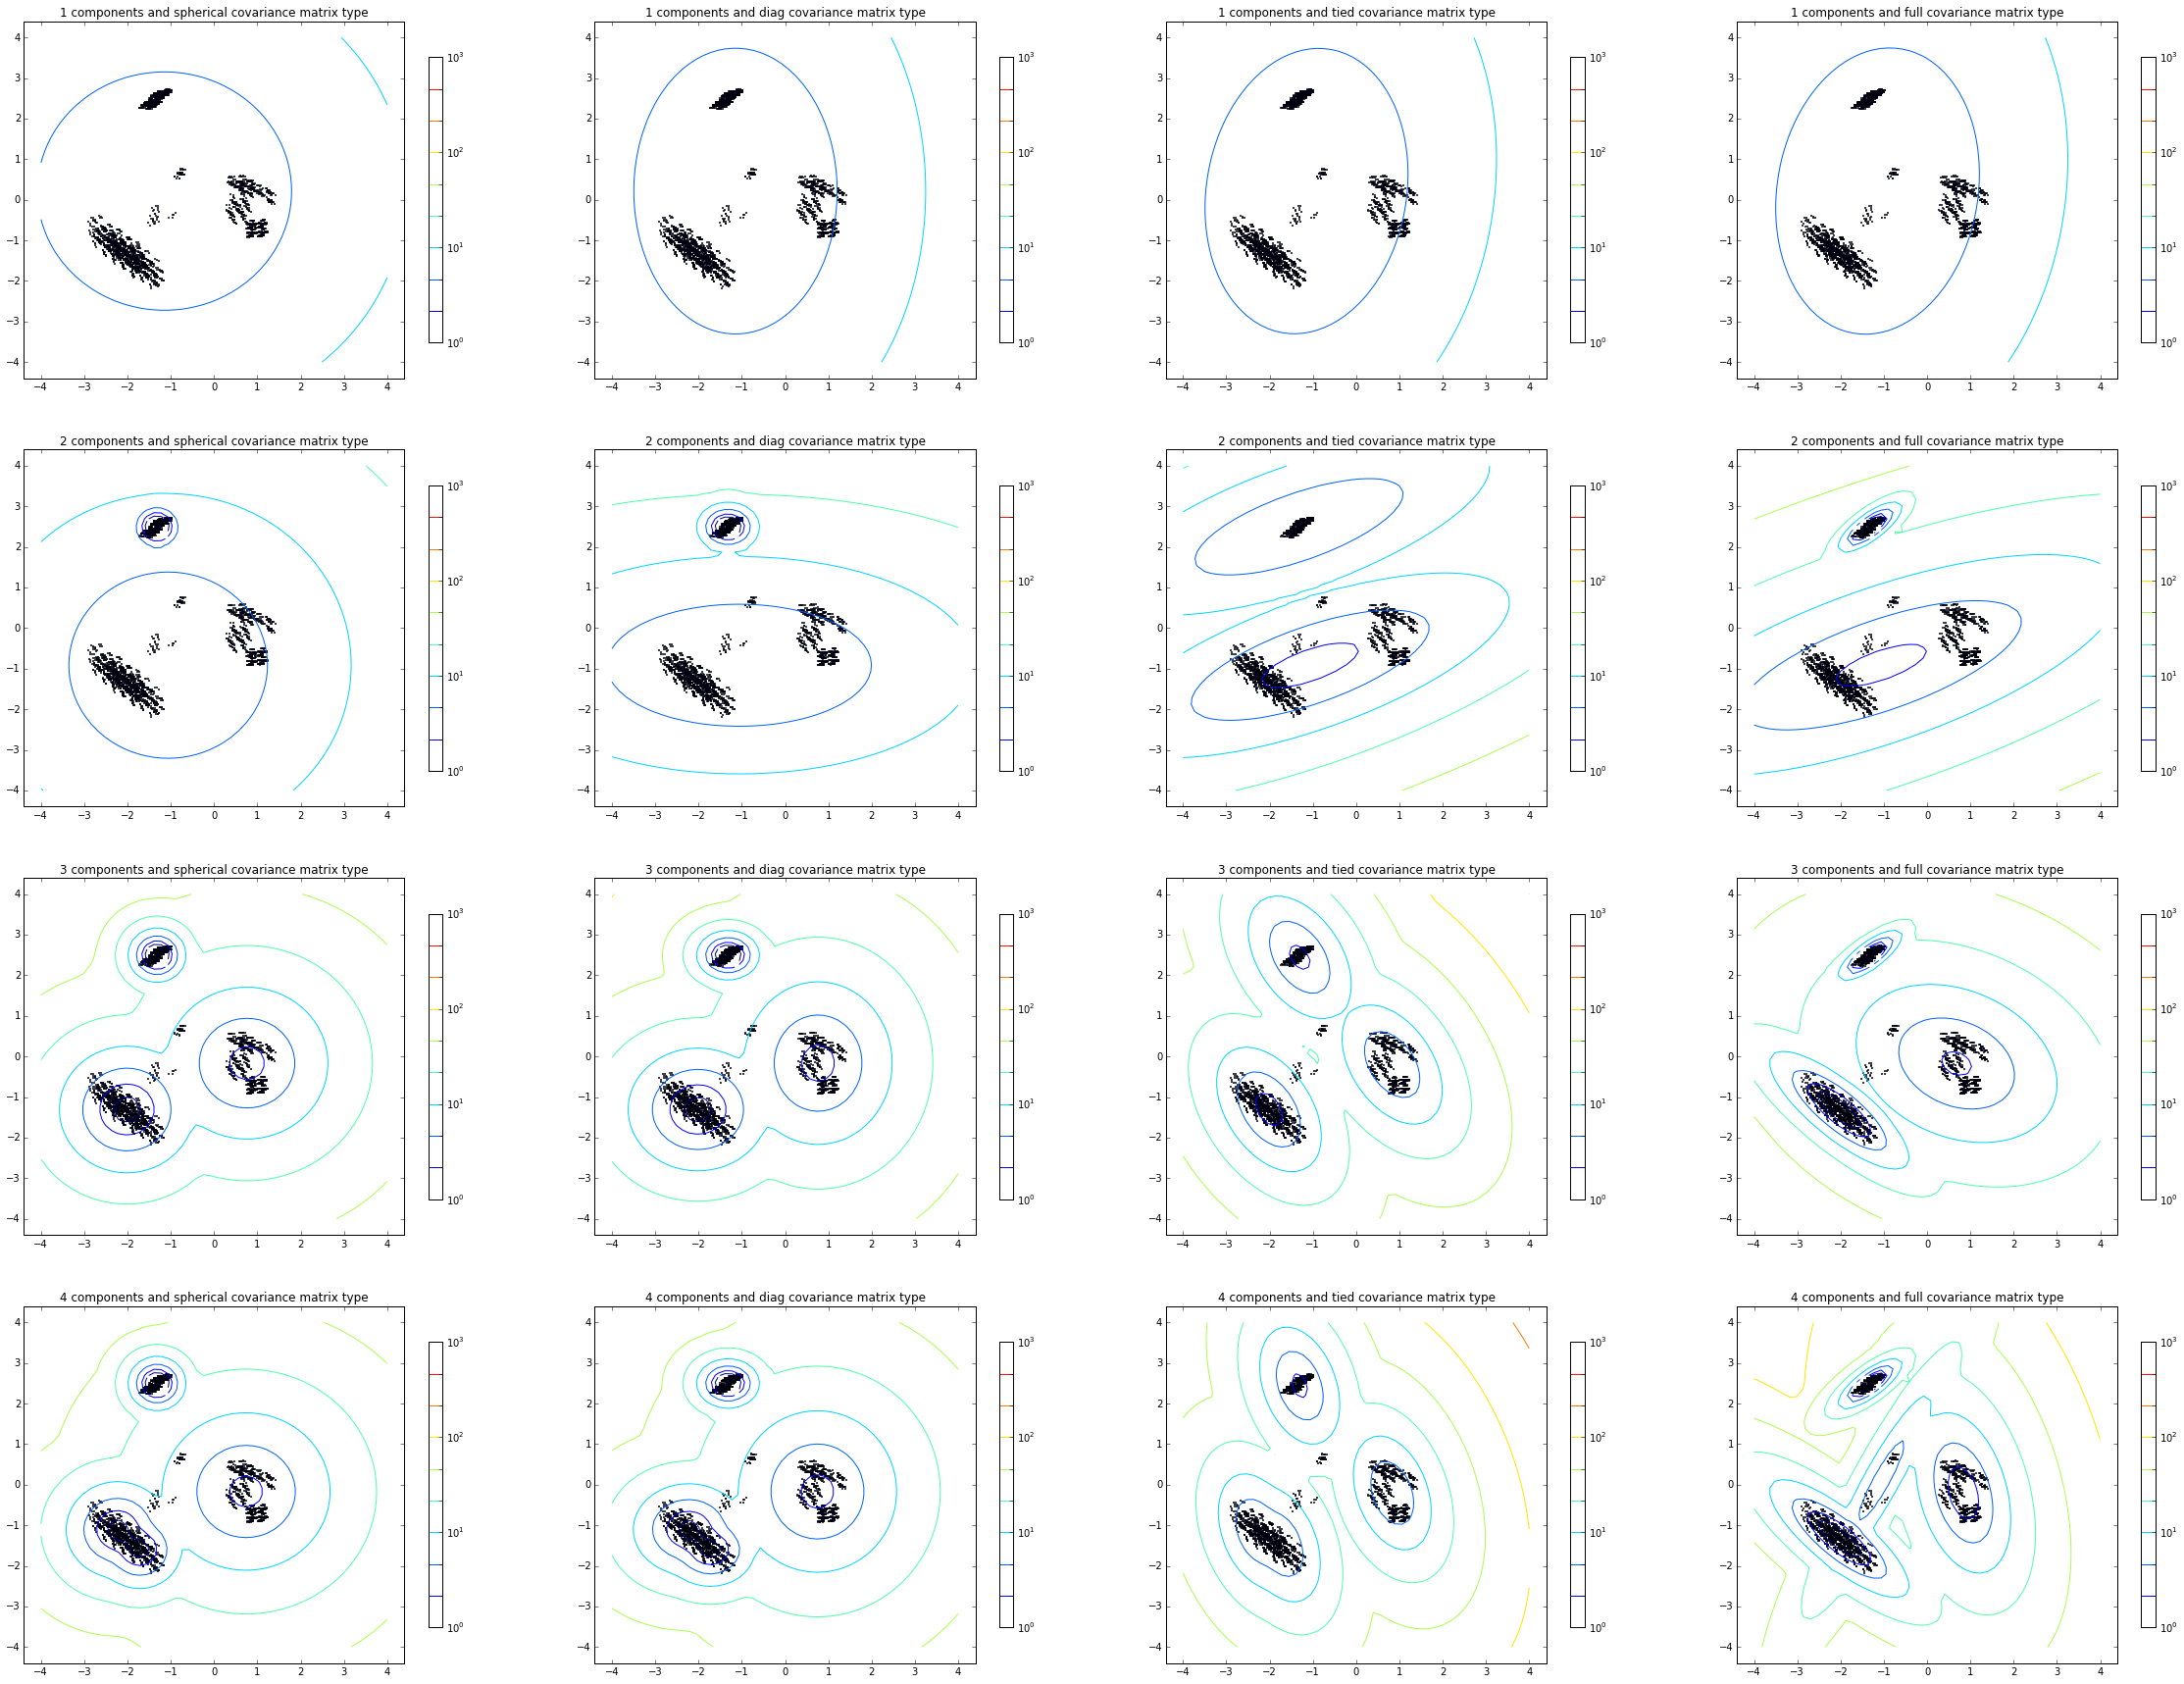

In [51]:
def P4():
    ### STUDENT START ###
    try:
        sklearn_pca = PCA(n_components=2)
        sklearn_transf = sklearn_pca.fit_transform(train_data)
        poison_cases = []
        non_poison_cases= []
        poison_cases = sklearn_transf[train_labels==1]
        non_poison_cases = sklearn_transf[train_labels==0] 
        
        #vairable to hol the mixture component and covraince matrix Type
        mix_comp = [1,2,3,4]
        cov_mat_type = ['spherical','diag','tied','full']
        
        # display predicted scores by the model as a contour plot
        x = np.linspace(-4.0, 4.0)
        y = np.linspace(-4.0, 4.0)
        X, Y = np.meshgrid(x, y)
        XX = np.array([X.ravel(), Y.ravel()]).T
        
        fig = plt.figure()
        fig.set_size_inches(40,30)
        print("Negative log-likelihood predicted by a GMM")
        plt_index = 0
        for i in range(len(mix_comp)):
            for j in range(len(cov_mat_type)):
                plt_index = plt_index + 1
                # fit a Gaussian Mixture Model with two components
                clf = GMM(n_components=mix_comp[i], covariance_type=cov_mat_type[j])
                clf.fit(poison_cases)

                #print clf.score_samples
                Z = -clf.score_samples(XX)[0]
                Z = Z.reshape(X.shape)
                a = fig.add_subplot(4,4,plt_index)
                a.set_title("%s components and %s covariance matrix type" %(mix_comp[i],cov_mat_type[j]))
                CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                                 levels=np.logspace(0, 3, 10))
                CB = plt.colorbar(CS, shrink=0.8, extend='both')
                plt.scatter(poison_cases[:, 0], poison_cases[:, 1], .8)
        plt.axis('tight')
        plt.show()
            
            
            
    except Exception as e:
        print "Exception Occured: ", e.args
        raise
    ### STUDENT END ###

P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [54]:
def P5():
    ### STUDENT START ###
    try:
        sklearn_pca = PCA(n_components=2)
        sklearn_transf = sklearn_pca.fit_transform(train_data)
        test_transf = sklearn_pca.transform(test_data)
        poison_cases = []
        non_poison_cases= []
        poison_cases = sklearn_transf[train_labels==1]
        non_poison_cases = sklearn_transf[train_labels==0] 
        
        # fit a Gaussian Mixture Model for poisonous data 
        clf_pos = GMM(n_components=4, covariance_type='full')
        clf_pos.fit(poison_cases)
        
        # fit a Gaussian Mixture Model for non-poisonous data 
        clf_neg = GMM(n_components=4, covariance_type='full')
        clf_neg.fit(non_poison_cases)
        
        #predict the score using both positive and negative GMM classifier
        pos_pred = clf_pos.score(test_transf)
        neg_pred = clf_neg.score(test_transf)
        
        pred_labels = (pos_pred >= neg_pred).astype(int)
        
        print "Accuracy for Positive and Negative GMM",metrics.accuracy_score(test_labels,pred_labels)*100
                   
    except Exception as e:
        print "Exception Occured: ", e.args
        raise
    ### STUDENT END ###
P5()

Accuracy for Positive and Negative GMM 95.0177935943


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [104]:
#function to calculate model accuracy
def get_model_accuracy(pca_comp, gmm_comp,gmm_cov_type,best_accuracy):
    try:
        sklearn_pca = PCA(n_components=pca_comp)
        sklearn_transf = sklearn_pca.fit_transform(train_data)
        test_transf = sklearn_pca.transform(test_data)

        # fit a Gaussian Mixture Model for poisonous data 
        clf_pos = GMM(n_components=gmm_comp, covariance_type=gmm_cov_type)
        clf_pos.fit(sklearn_transf[train_labels==1])
        
        # fit a Gaussian Mixture Model for non-poisonous data 
        clf_neg = GMM(n_components=gmm_comp, covariance_type=gmm_cov_type)
        clf_neg.fit(sklearn_transf[train_labels==0] )

        #predict the score using both positive and negative GMM classifier
        pos_pred = clf_pos.score(test_transf)
        neg_pred = clf_neg.score(test_transf)
        
        pred_labels = (pos_pred >= neg_pred).astype(int)
        model_accuracy = round(metrics.accuracy_score(test_labels,pred_labels)*100,2)
        return model_accuracy
        
    except Exception as e:
        print "Exception Occured: ", e.args
        raise
        
        
# the below calculation are taken from class discussion and notes are below
# https://docs.google.com/document/d/1BCrFHmvn4Gt7el79JsL4r1fukkHOadz3cYch7IwgqfA/edit
def get_model_param(cov_type,pca_comp,gmm_comp,n_classes):
    p = pca_comp
    D = gmm_comp
    if cov_type == 'spherical':
        num_param = ( (D * p) + D) * n_classes
    if cov_type == 'diag':
        num_param = ((D*p)+(D*p)) * n_classes
    if cov_type == 'full':
        num_param = ((D*p)+ (D * (p + float(p) * (p-1) / 2) ) ) * n_classes
    if cov_type == 'tied':
        num_param = ((D*p)+ (p + float(p) * (p-1) / 2 ) ) * n_classes
    return num_param

def P6():
    ### STUDENT START ###
    try:
        n_classes = 2
        pca_max = 25
        gmm_comp_max = 14
        cov_mat_type = ['spherical','diag','tied','full']

        best_accuracy = 0
        for i in range(len(cov_mat_type)):
            for pca in range (2,pca_max):
                for gmm in range (1,gmm_comp_max):
                    model_param = get_model_param(cov_mat_type[i],pca,gmm,n_classes)
                    if model_param <= 50:
                        mdl_accuracy = get_model_accuracy(pca,gmm,cov_mat_type[i],best_accuracy)
                        if mdl_accuracy > best_accuracy:
                            best_accuracy = mdl_accuracy
                            accuracy_bst = {'accuracy':best_accuracy, 'pca_comp':pca ,'gmm_comp':gmm ,'cov_type':cov_mat_type[i],'num_model_param':model_param}
        print "Best Accuracy for %d PCA Component and %s component %s Covariance = % 3.2f" %(accuracy_bst['pca_comp'],accuracy_bst['gmm_comp'],accuracy_bst['cov_type'],accuracy_bst['accuracy'])
        print "Number of model paramaters are : ",accuracy_bst['num_model_param']
    except Exception as e:
        print "Exception Occured: ", e.args
        raise
    ### STUDENT END ###

P6()

Best Accuracy for 7 PCA Component and 3 component spherical Covariance =  97.33
Number of model paramaters are :  48
